In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from matplotlib.lines import Line2D
from geopy.distance import geodesic

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

import cmocean
import cmocean.cm as cmo
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from matplotlib.dates import DateFormatter


In [2]:
df_meta = pd.read_csv('../HALO/Data/CDOM/HALO/WC_ABS_2229_2227_Metadata.csv', sep=',', index_col=0)
df_spec = pd.read_csv('../HALO/Data/CDOM/HALO/WC_ABS_HALO_2209_2207_Pchip_wavelenths.csv', sep=',', index_col=0)
df_out = pd.read_csv('../HALO/Data/CDOM/HALO/WC_ABS_HALO_2209_2207_outputs.csv', sep=',', index_col=0)
df_toc = pd.read_csv('../HALO/Data/TOC/WC_TOC_HALO_2227_2229.csv', sep=',', index_col=0)
df_fe = pd.read_csv('../HALO/Data/IRON/HALO_IRON.csv', sep=',', index_col=0)


def add_prefix_to_columns(df):
    new_columns = ['a' + col for col in df.columns]
    df.columns = new_columns
    return df

df_spec = add_prefix_to_columns(df_spec)

df = df_meta.join(df_out)
df = df.join(df_spec)

df_toc['NPOC_uM'] = df_toc['NPOC Conc (uM)']
df_doc = df_toc['NPOC_uM']
df_doc

df = df.join(df_doc)
df = df.join(df_fe)



df['surf'] = df['Sample Depth']
df['Time'] = pd.to_datetime(df['Time'])
df['date_time'] = df['Time'].dt.strftime('%H:%M')
df['date_time'] = pd.to_datetime(df['date_time'])

df['Location'] = df['Location ']
df['Location'].unique()

df['FeX_uM'] = df['Fe2_uM'].add(df['FeT_uM'], fill_value=0)
df['FeX_uM']

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_23460\1001137128.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_23460\1001137128.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_time'] = pd.to_datetime(df['date_time'])


Sample
222703         NaN
222704         NaN
222705         NaN
222706         NaN
222707         NaN
222708         NaN
222709         NaN
222710         NaN
222711         NaN
222712         NaN
222713         NaN
222714         NaN
222715         NaN
222716         NaN
222727         NaN
222728         NaN
222729    0.119129
222730    0.145010
222731    0.099225
222732         NaN
222733    0.126152
222734    0.131811
222735         NaN
222736    0.114624
222737    0.096541
222738    0.138344
222739         NaN
222740    0.129280
222901    0.086735
222902    0.058995
222903    0.049840
222904    0.040409
222905    0.033936
222906    0.041148
222907    0.075454
222908    0.049285
222909    0.031162
222910    0.035045
222911    0.025984
222912    0.030607
222913    0.044385
222914    0.071385
222927    0.038097
222928    0.044292
222929    0.127421
222930    0.033936
222931    0.037912
222932    0.096074
222933    0.036063
222934    0.023117
222935    0.055388
222936    0.063156
22293

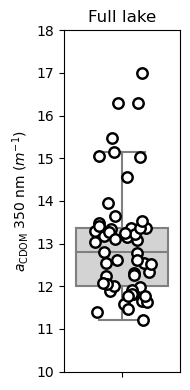

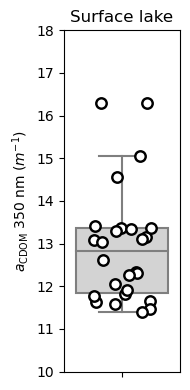

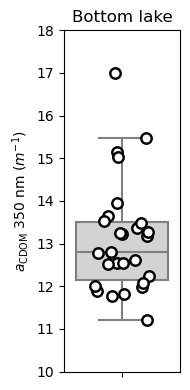

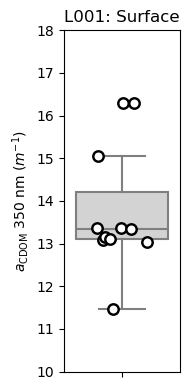

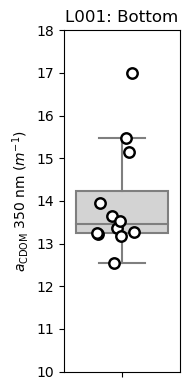

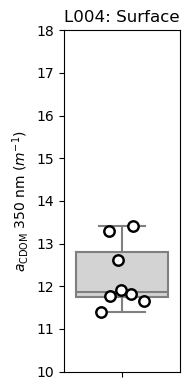

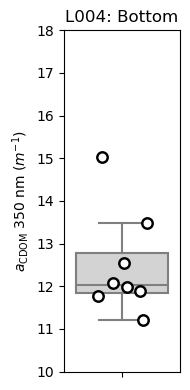

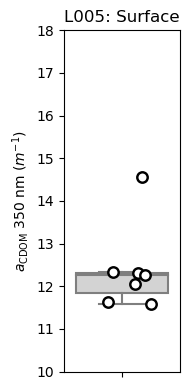

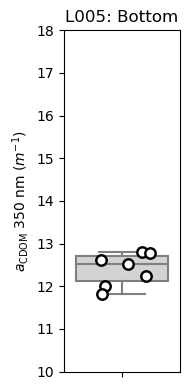

In [3]:
def boxplot(ds, var, title, ylabel, save_name):
    plt.figure(figsize=(2, 4))
    sns.boxplot(y=ds[var], color='lightgrey', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(y=ds[var], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.ylim(10,18)
    plt.tight_layout()
    plt.savefig(f'../HALO/Figures/{save_name}.png')
    plt.show()
    
df_surf = df[df['surf'] == 'S']
df_bot = df[df['surf'] == 'B']

boxplot(df,'a350', 'Full lake', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'full_data')
boxplot(df_surf,'a350', 'Surface lake', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'surf')
boxplot(df_bot,'a350', 'Bottom lake', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'bot')

boxplot(df_surf[df_surf['Location'] == 'L001'],'a350', 'L001: Surface', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'loo1_surf')
boxplot(df_bot[df_bot['Location'] == 'L001'],'a350', 'L001: Bottom', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'loo1_bot')
boxplot(df_surf[df_surf['Location'] == 'L004'],'a350', 'L004: Surface', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'loo4_surf')
boxplot(df_bot[df_bot['Location'] == 'L004'],'a350', 'L004: Bottom', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'loo4_bot')
boxplot(df_surf[df_surf['Location'] == 'L005'],'a350', 'L005: Surface', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'loo5_surf')
boxplot(df_bot[df_bot['Location'] == 'L005'],'a350', 'L005: Bottom', r'${{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)', 'loo5_bot')

In [4]:
df_surf['Time'].unique()

<DatetimeArray>
['2024-04-09 08:45:00', '2024-04-09 09:50:00', '2024-04-09 10:45:00',
 '2024-04-09 11:35:00',                 'NaT', '2024-04-09 13:00:00',
 '2024-04-09 13:42:00', '2024-04-09 15:37:00', '2024-04-09 16:31:00',
 '2024-04-09 17:47:00', '2024-04-09 18:45:00', '2024-04-09 19:51:00',
 '2024-04-09 21:02:00', '2024-04-09 22:08:00', '2024-04-09 08:00:00',
 '2024-04-09 08:49:00', '2024-04-09 09:40:00', '2024-04-09 10:20:00',
 '2024-04-09 11:20:00', '2024-04-09 12:05:00', '2024-04-09 12:45:00',
 '2024-04-09 15:10:00', '2024-04-09 16:15:00', '2024-04-09 17:05:00',
 '2024-04-09 18:38:00', '2024-04-09 19:34:00', '2024-04-09 20:38:00',
 '2024-04-09 21:36:00']
Length: 28, dtype: datetime64[ns]

In [5]:
dfs = df_surf
dfb = df_bot

dfs.index = dfs['Time']
dfb.index = dfb['Time']

dfb['a412_b'] = dfb['a412']
dfs['a412_s'] = dfs['a412']

dfb['NPOC_b'] = dfb['NPOC_uM']
dfs['NPOC_s'] = dfs['NPOC_uM']

dfb['Fe2_b'] = dfb['Fe2_uM']
dfs['Fe2_s'] = dfs['Fe2_uM']

dfb['FeT_b'] = dfb['FeT_uM']
dfs['FeT_s'] = dfs['FeT_uM']


dfb['FeX_b'] = dfb['FeX_uM']
dfs['FeX_s'] = dfs['FeX_uM']


dfb_m = dfb['a412_b']
dfb_doc = dfb['NPOC_b']
dfb_2 = dfb['Fe2_b']
dfb_t = dfb['FeT_b']
dfb_x = dfb['FeX_b']


df_cor_cdom = dfs.join(dfb_m)
df_cor_doc = dfs.join(dfb_doc)
df_cor_fe2 = dfs.join(dfb_2)
df_cor_fet = dfs.join(dfb_t)
df_cor_fex = dfs.join(dfb_x)


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_23460\3479474882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['a412_b'] = dfb['a412']
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_23460\3479474882.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['a412_s'] = dfs['a412']
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_23460\3479474882.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

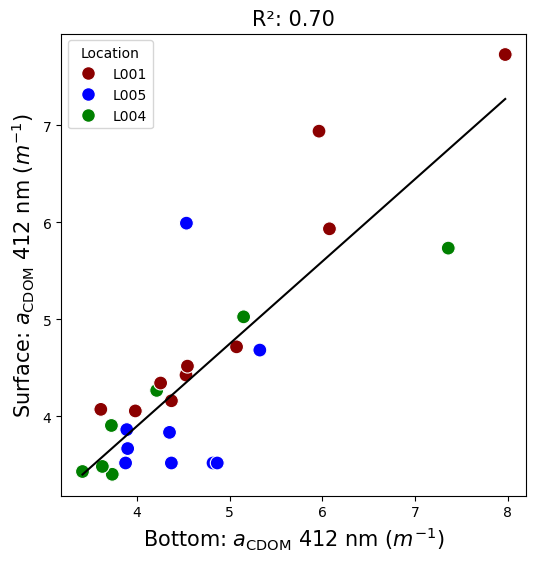

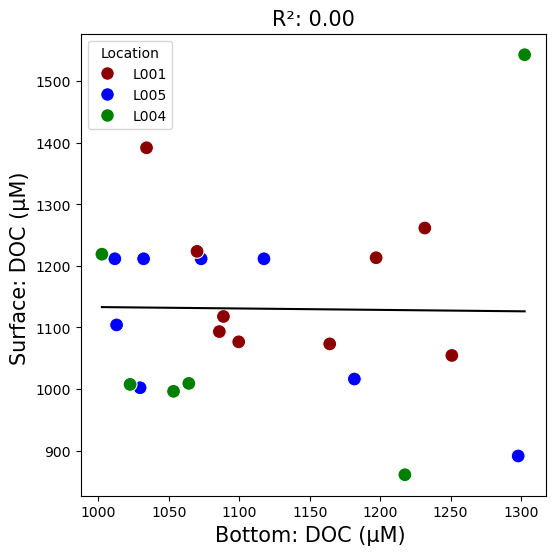

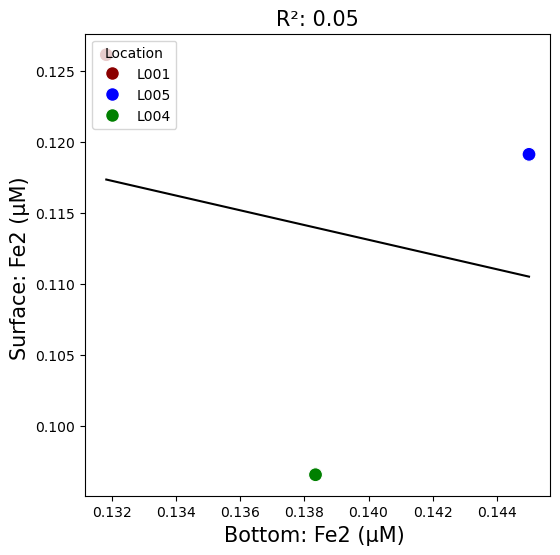

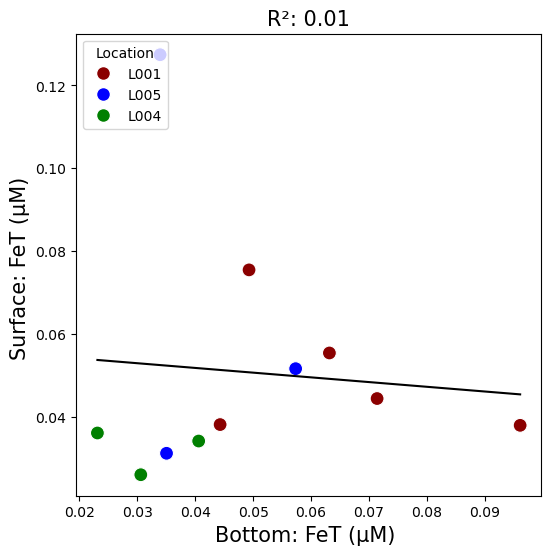

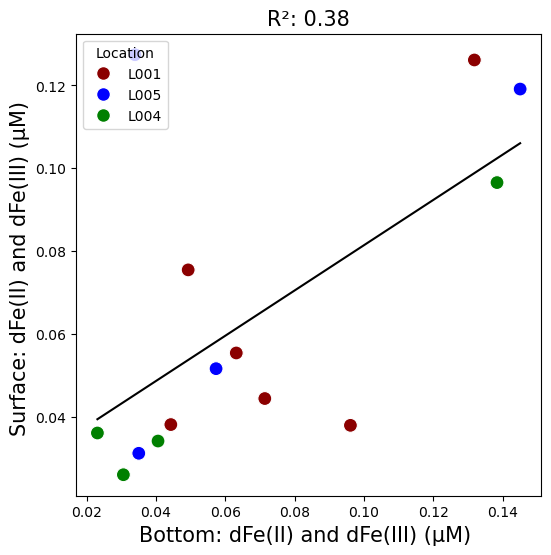

In [6]:

color_map = {
    'L001': 'darkred',
    'L005': 'blue',
    'L004': 'green',
}

label_map = {
    'L001': 'L001',
    'L005': 'L005',
    'L004': 'L004',
}

def xyplotcolor(ds):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = ds.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    subcats = data[z_var].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=[color_map[c] for c in subcats], s=100, data=data, ax=axes, legend=False)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)
    
    handles = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=color_map[label], markersize=10, label=label_map[label]) for label in label_map]
    axes.legend(handles=handles, title='Location', loc='upper left')

    # Show the plot
    plt.savefig(f'../HALO/Figures/WC_{save_name}.png')
    pltx_var = 'aou'

y_var = 'a412_s'
x_var = 'a412_b'
y_var_lab = r'Surface: $a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
x_var_lab = r'Bottom: $a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'

z_var = 'Location'

titel = ""
save_name = 'surf_bottom'

xyplotcolor(df_cor_cdom)


y_var = 'NPOC_s'
x_var = 'NPOC_b'
y_var_lab = r'Surface: DOC (µM) '
x_var_lab = r'Bottom: DOC (µM) '

z_var = 'Location'

titel = ""
save_name = 'surf_bottom_doc'

xyplotcolor(df_cor_doc)




y_var = 'Fe2_s'
x_var = 'Fe2_b'
y_var_lab = r'Surface: Fe2 (µM) '
x_var_lab = r'Bottom: Fe2 (µM) '

z_var = 'Location'

titel = ""
save_name = 'surf_bottom_fe2'

xyplotcolor(df_cor_fe2)



y_var = 'FeT_s'
x_var = 'FeT_b'
y_var_lab = r'Surface: FeT (µM) '
x_var_lab = r'Bottom: FeT (µM) '

z_var = 'Location'

titel = ""
save_name = 'surf_bottom_fet'

xyplotcolor(df_cor_fet)



y_var = 'FeX_s'
x_var = 'FeX_b'
y_var_lab = r'Surface: dFe(II) and dFe(III) (µM) '
x_var_lab = r'Bottom: dFe(II) and dFe(III) (µM) '

z_var = 'Location'

titel = ""
save_name = 'surf_bottom_fex'

xyplotcolor(df_cor_fex)

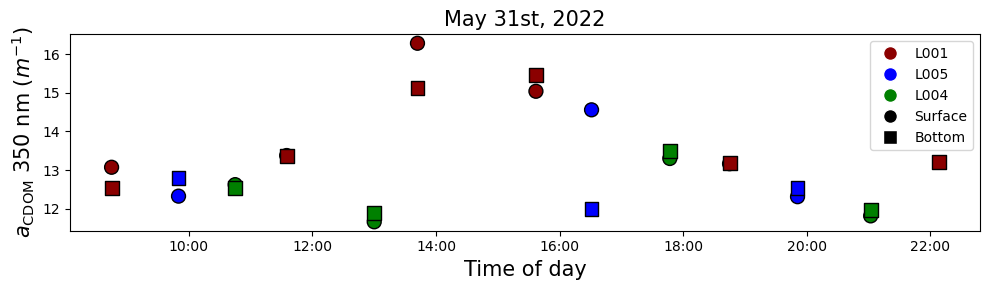

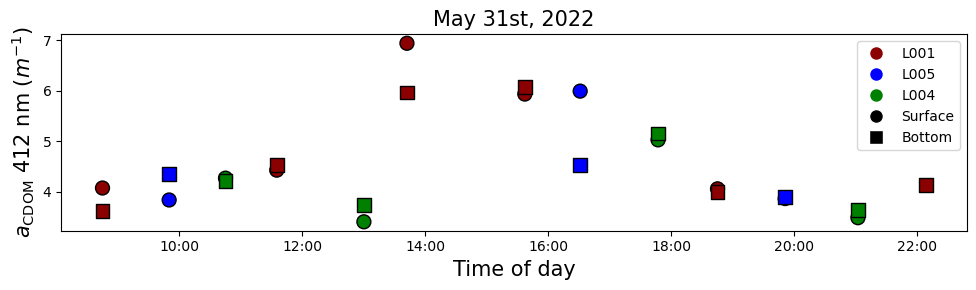

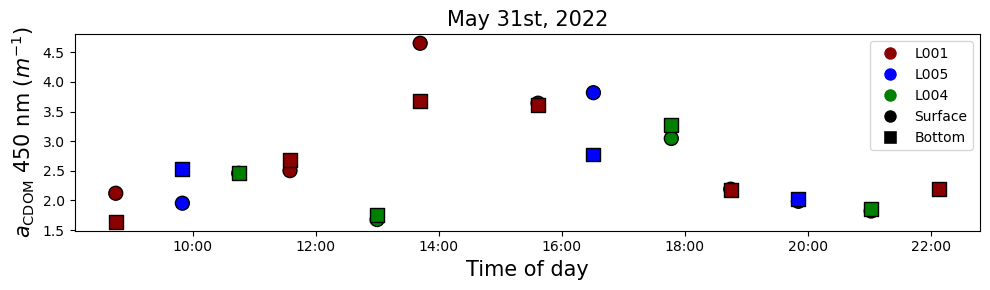

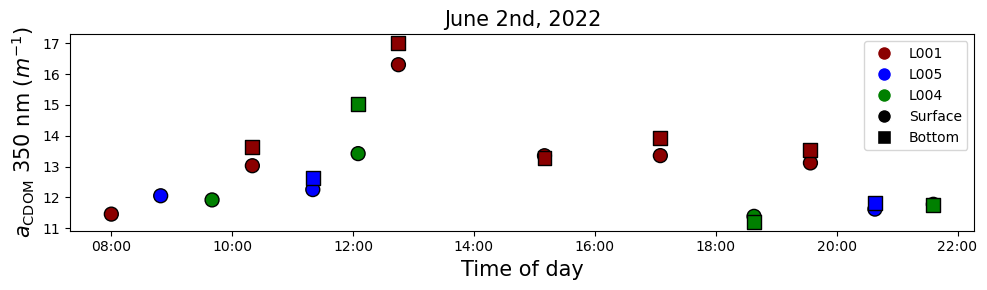

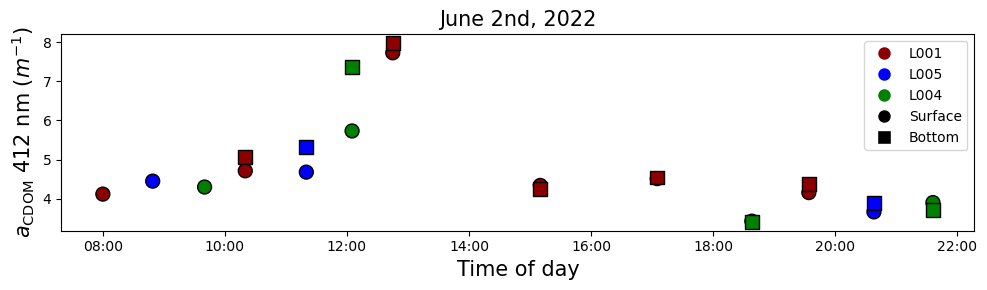

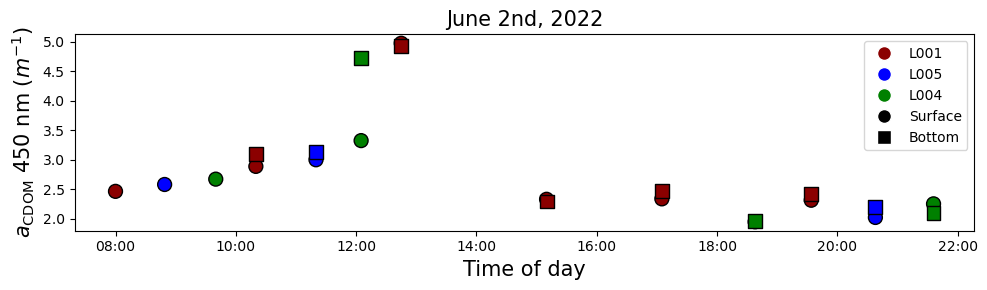

In [7]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

color_map = {
    'L001': 'darkred',
    'L005': 'blue',
    'L004': 'green',
}

label_map = {
    'L001': 'L001',
    'L005': 'L005',
    'L004': 'L004',
}

label_map2 = {
    'S': 'Surface',
    'B': 'Bottom'
}

color_map2 = {
    'S': 'o',
    'B': 's'
}


def time_series(ds, x_vars, y_vars, c_vars, ylabs, titel, save_name): 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    sub = ds.dropna(subset=[x_var, y_var])
    
    subs = sub[sub['surf'] == 'S']
    subb = sub[sub['surf'] == 'B']
    
    datas = subs[[x_var, y_var, c_var]]
    datas = datas[pd.notna(datas[c_var])]
    
    datab = subb[[x_var, y_var, c_var]]
    datab = datab[pd.notna(datab[c_var])]
    
    subcats = datas['Location'].tolist()
    subcatb = datab['Location'].tolist()

    # Scatter plot with datetime x-axis
    sc = axes.scatter(x=datas['date_time'], y=datas[y_var], c=[color_map[c] for c in subcats], s=100, marker = 'o', edgecolor = 'black')
    sz = axes.scatter(x=datab['date_time'], y=datab[y_var], c=[color_map[c] for c in subcatb], s=100, marker = "s", edgecolor = 'black')

# Set labels and title
    axes.set_xlabel('Time of day', size=15)
    axes.set_ylabel(ylabs, size=15)

# Create custom legend
    # Create custom legend
    handles1 = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=color_map[label], markersize=10, label=label_map[label]) for label in label_map]
    handles2 = [plt.Line2D([0], [0], color='white', markerfacecolor='black', marker=color_map2[label], markersize=10, label=label_map2[label]) for label in label_map2]

    # Combine handles
    all_handles = handles1 + handles2

    # Get labels for combined handles
    labels = [handle.get_label() for handle in all_handles]

    plt.legend(handles=all_handles, labels=labels, title='', loc='upper right')


    #handles = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=color_map[label], markersize=10, label=label_map[label]) for label in label_map]
    #axes.legend(handles=handles, title='Location', loc='upper right')
    
    #handles2 = [plt.Line2D([0], [0], color='white', markerfacecolor='black', markersize=10, label=label_map2[label]) for label in label_map2]
    #axes.legend(handles=handles2, title='Depth', loc='upper left')

# Set date format for x-axis ticks
    date_form = DateFormatter("%H:%M")
    axes.xaxis.set_major_formatter(date_form)

# Rotate x-axis labels for better readability
    plt.xticks(rotation=0)

    axes.set_title(titel, size = 15)
    
    plt.tight_layout()
    plt.savefig(f'../HALO/Figures/{save_name}.png')
    plt.show()

df_may = df[df['Date'] == '5/31/2022']
df_june = df[df['Date'] == '6/2/2022']

    
x_var = 'date_time'
y_var = 'a350'
c_var = 'Location'
ylab = r'$a_{\mathrm{CDOM}}$ 350 nm ($m^{-1}$)'
titel = 'May 31st, 2022'
savename = 'May350'
time_series(df_may,x_var, y_var, c_var, ylab, titel, savename)

y_var = 'a412'
ylab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
savename = 'May412'
time_series(df_may,x_var, y_var, c_var, ylab, titel, savename)

y_var = 'a450'
ylab = r'$a_{\mathrm{CDOM}}$ 450 nm ($m^{-1}$)'
savename = 'May450'
time_series(df_may,x_var, y_var, c_var, ylab, titel, savename)

x_var = 'date_time'
y_var = 'a350'
c_var = 'Location'
ylab = r'$a_{\mathrm{CDOM}}$ 350 nm ($m^{-1}$)'
titel = 'June 2nd, 2022'
savename = 'june350'
time_series(df_june,x_var, y_var, c_var, ylab, titel, savename)

y_var = 'a412'
ylab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
savename = 'june412'
time_series(df_june,x_var, y_var, c_var, ylab, titel, savename)

y_var = 'a450'
ylab = r'$a_{\mathrm{CDOM}}$ 450 nm ($m^{-1}$)'
savename = 'june450'
time_series(df_june,x_var, y_var, c_var, ylab, titel, savename)


                            OLS Regression Results                            
Dep. Variable:                NPOC_uM   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.269
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.309
Time:                        12:15:33   Log-Likelihood:                -139.51
No. Observations:                  26   AIC:                             287.0
Df Residuals:                      22   BIC:                             292.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     951.4532    135.078      7.044      

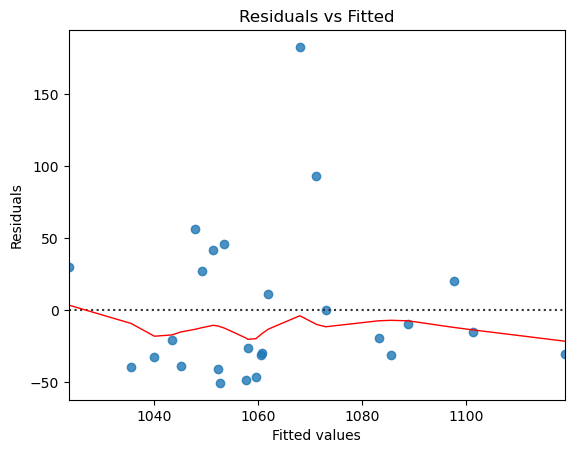

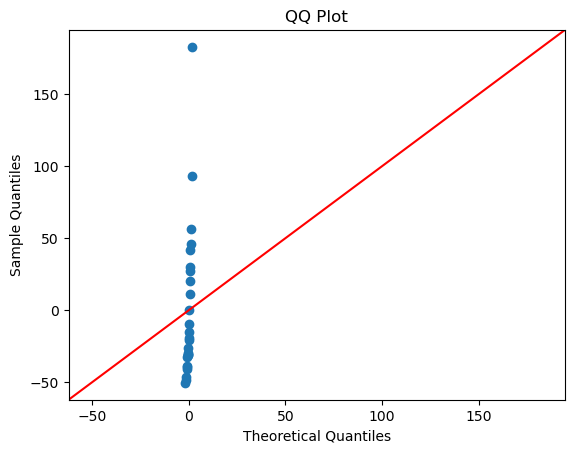

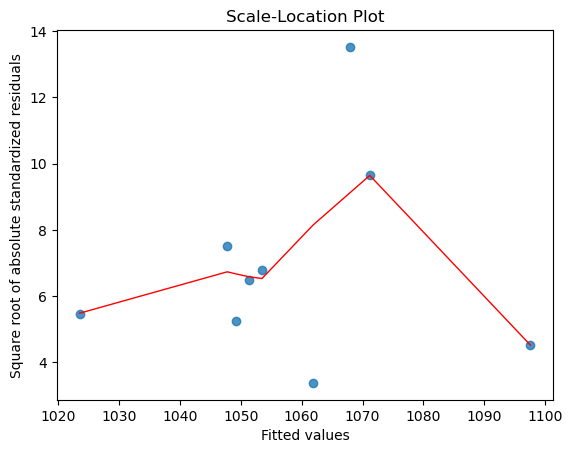

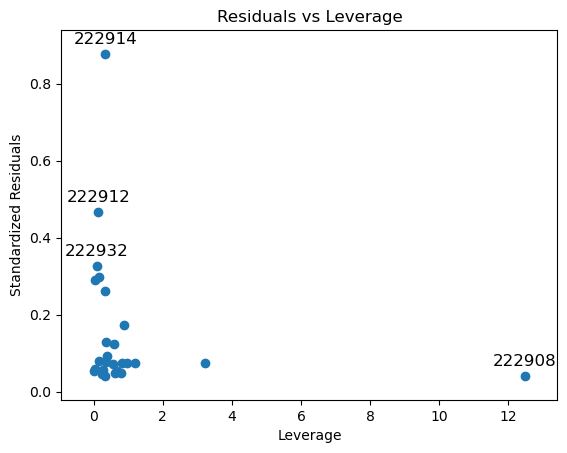

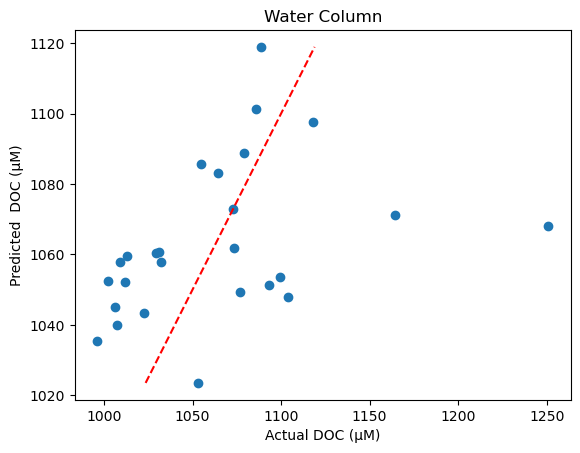

In [8]:
formula = 'NPOC_uM ~ a412 * FeT_uM'

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df)

# Insert predictions back to dataframe
df['NPOC_uM_pred'] = predicted

# Plot
plt.scatter(df['NPOC_uM'], predicted)
plt.xlabel(r'Actual DOC (µM)')
plt.ylabel('Predicted  DOC (µM)')
plt.title('Water Column')
plt.plot([df['NPOC_uM_pred'].min(), df['NPOC_uM_pred'].max()], 
         [df['NPOC_uM_pred'].min(), df['NPOC_uM_pred'].max()], 'r--')
plt.show()

In [9]:
df_bc = pd.read_csv('../HALO/Data/Benthic_chamber/All_data_together.csv', sep=',', index_col=0)


df_bc['date_time'] = pd.to_datetime(df_bc['Date'])

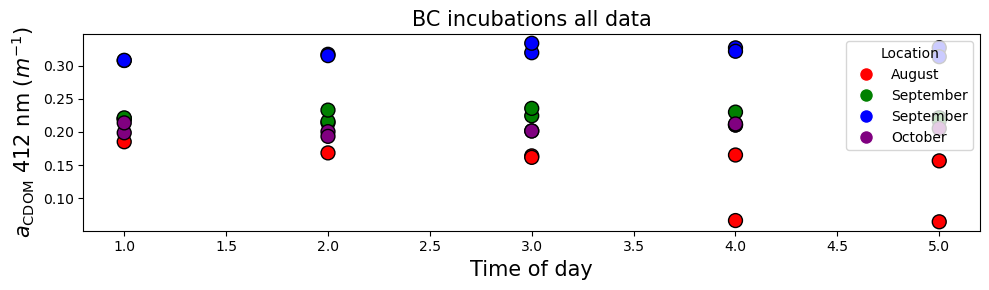

In [10]:
color_map = {
    '8/24/2021':'r',
    '9/14/2021':'g',
    '9/29/2021':'b',
    '10/12/2021':'purple'
}

label_map = {
    '8/24/2021':'August',
    '9/14/2021':'September',
    '9/29/2021':'September',
    '10/12/2021':'October'
}

def time_series(ds, x_vars, y_vars, c_vars, ylabs, titel, save_name): 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    sub = ds.dropna(subset=[x_var, y_var])
    
    datas = sub[[x_var, y_var, c_var]]
    datas = datas[pd.notna(datas[c_var])]
    
    subcats = datas['Date'].tolist()

    # Scatter plot with datetime x-axis
    sc = axes.scatter(x=datas[x_var], y=datas[y_var], c=[color_map[c] for c in subcats], s=100, marker = 'o', edgecolor = 'black')

# Set labels and title
    axes.set_xlabel('Time of day', size=15)
    axes.set_ylabel(ylabs, size=15)

# Create custom legen

    handles = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=color_map[label], markersize=10, label=label_map[label]) for label in label_map]
    axes.legend(handles=handles, title='Location', loc='upper right')
    
# Rotate x-axis labels for better readability
    plt.xticks(rotation=0)

    axes.set_title(titel, size = 15)
    
    plt.tight_layout()
    #plt.savefig(f'../HALO/Figures/{save_name}.png')
    plt.show()


x_var = 'Time'
y_var = 'abs_412_SEM'
c_var = 'Date'
ylab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
titel = 'BC incubations all data'
savename = 'BC_test'
time_series(df_bc,x_var, y_var, c_var, ylab, titel, savename)

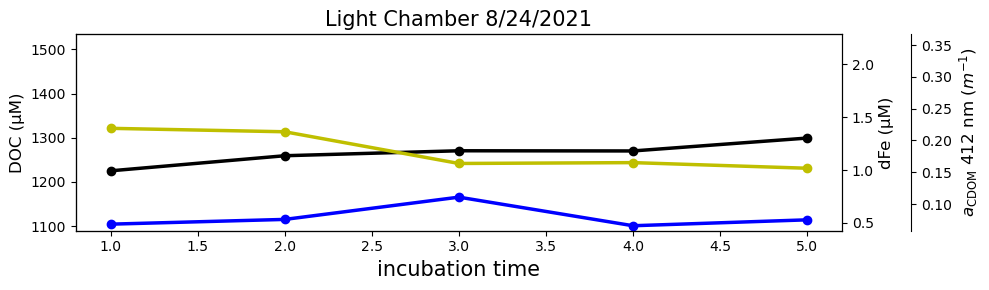

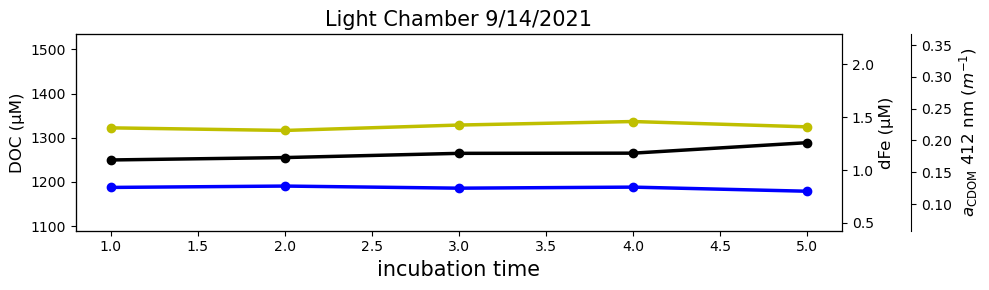

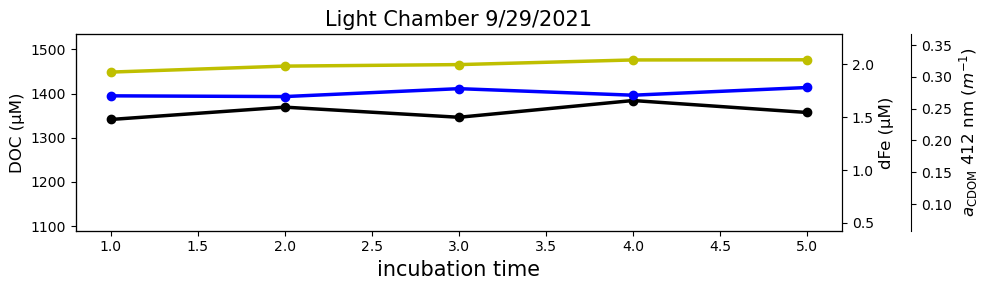

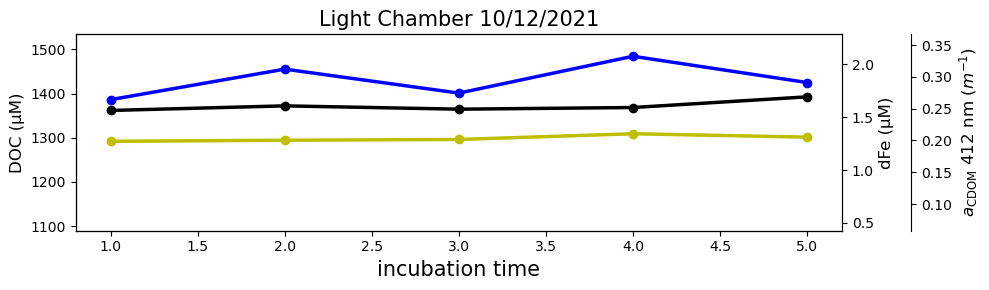

In [11]:
x_var = 'NPOC_uM'
y_var = 'abs_412_SEM'
c_var = 'FeT_uM'
#ylab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
#titel = 'BC incubations all data'
#savename = 'BC_test'

dates = df_bc['Date'].unique()

for date in dates:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    sub = df_bc[df_bc['Date'] == date]
    sub = sub[sub['Chamber'] == 'Light']
    
    axes.plot(sub['Time'], sub['NPOC_uM'], color='black', linewidth=2.5, marker = 'o')
    axes.set_ylabel('DOC (µM)', fontsize=12)
    axes.spines['right'].set_position(('outward', 0))
    
    ax1 = axes.twinx()
    ax1.plot(sub['Time'], sub['FeT_uM'], color='b',linewidth=2.5, marker = 'o')
    ax1.set_ylabel('dFe (µM)', fontsize=12)
    ax1.spines['right'].set_position(('outward', 0))
    
    ax2 = axes.twinx()
    ax2.plot(sub['Time'], sub['abs_412_SEM'], color='y',linewidth=2.5, marker = 'o')
    ax2.set_ylabel(r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)', fontsize=12)
    ax2.spines['right'].set_position(('outward', 50))
    
    axes.set_ylim(df_bc['NPOC_uM'].min()*.9, df_bc['NPOC_uM'].max()*1.1)
    ax1.set_ylim(df_bc['FeT_uM'].min()*.9, df_bc['FeT_uM'].max()*1.1)
    ax2.set_ylim(df_bc['abs_412_SEM'].min()*.9, df_bc['abs_412_SEM'].max()*1.1)
    
# Set labels and title
    axes.set_xlabel('incubation time', size=15)
    #axes.set_ylabel(ylabs, size=15)
    
# Rotate x-axis labels for better readability
    plt.xticks(rotation=0)

    axes.set_title(f'Light Chamber {date}', size = 15)
    
    date_name = sub['date_time'].iloc[0]
    date_name = date_name.strftime('%Y-%m-%d')
    
    plt.tight_layout()
    plt.savefig(f'../HALO/Figures/BC_light_{date_name}.png')
    plt.show()

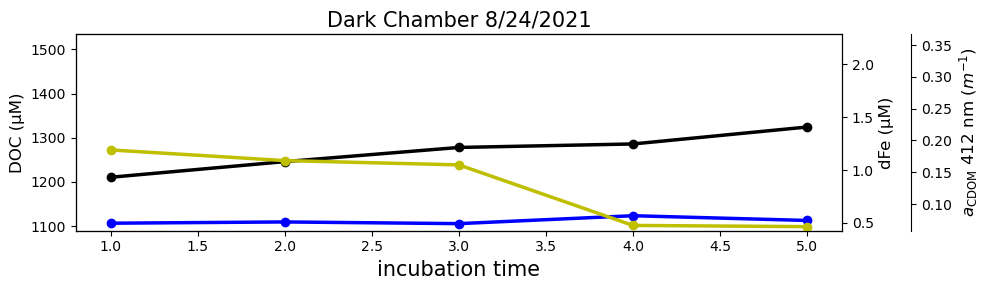

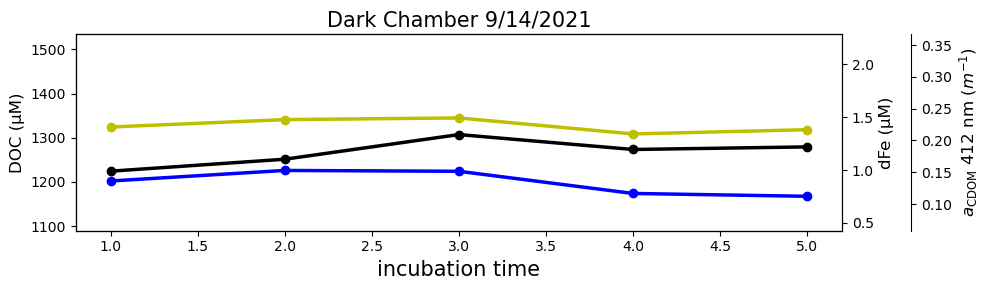

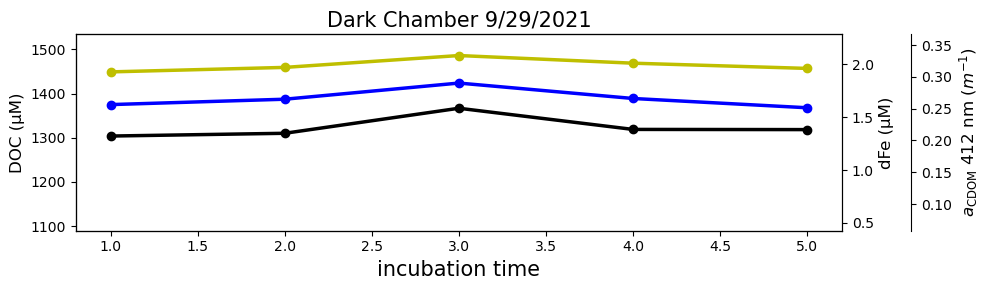

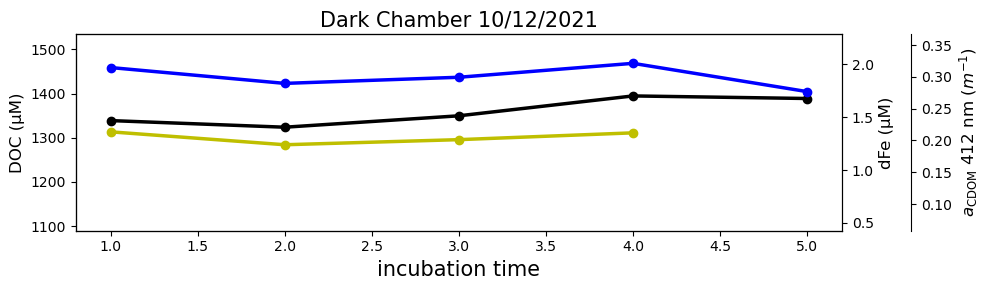

In [12]:
x_var = 'NPOC_uM'
y_var = 'abs_412_SEM'
c_var = 'FeT_uM'
#ylab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
#titel = 'BC incubations all data'
#savename = 'BC_test'

dates = df_bc['Date'].unique()

for date in dates:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    sub = df_bc[df_bc['Date'] == date]
    sub = sub[sub['Chamber'] == 'Dark']
    
    axes.plot(sub['Time'], sub['NPOC_uM'], color='black', linewidth=2.5, marker = 'o')
    axes.set_ylabel('DOC (µM)', fontsize=12)
    axes.spines['right'].set_position(('outward', 0))
    
    ax1 = axes.twinx()
    ax1.plot(sub['Time'], sub['FeT_uM'], color='b',linewidth=2.5, marker = 'o')
    ax1.set_ylabel('dFe (µM)', fontsize=12)
    ax1.spines['right'].set_position(('outward', 0))
    
    ax2 = axes.twinx()
    ax2.plot(sub['Time'], sub['abs_412_SEM'], color='y',linewidth=2.5, marker = 'o')
    ax2.set_ylabel(r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)', fontsize=12)
    ax2.spines['right'].set_position(('outward', 50))
    
    axes.set_ylim(df_bc['NPOC_uM'].min()*.9, df_bc['NPOC_uM'].max()*1.1)
    ax1.set_ylim(df_bc['FeT_uM'].min()*.9, df_bc['FeT_uM'].max()*1.1)
    ax2.set_ylim(df_bc['abs_412_SEM'].min()*.9, df_bc['abs_412_SEM'].max()*1.1)
    
# Set labels and title
    axes.set_xlabel('incubation time', size=15)
    #axes.set_ylabel(ylabs, size=15)
    
# Rotate x-axis labels for better readability
    plt.xticks(rotation=0)

    axes.set_title(f'Dark Chamber {date}', size = 15)
    
    date_name = sub['date_time'].iloc[0]
    date_name = date_name.strftime('%Y-%m-%d')
    
    plt.tight_layout()
    plt.savefig(f'../HALO/Figures/BC_dark_{date_name}.png')
    plt.show()

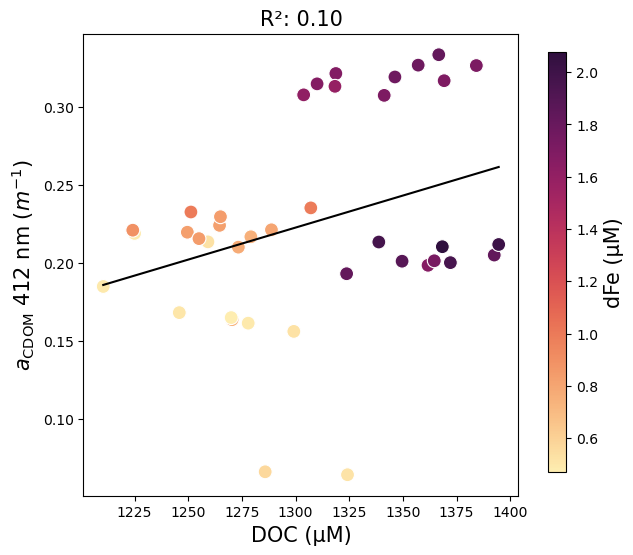

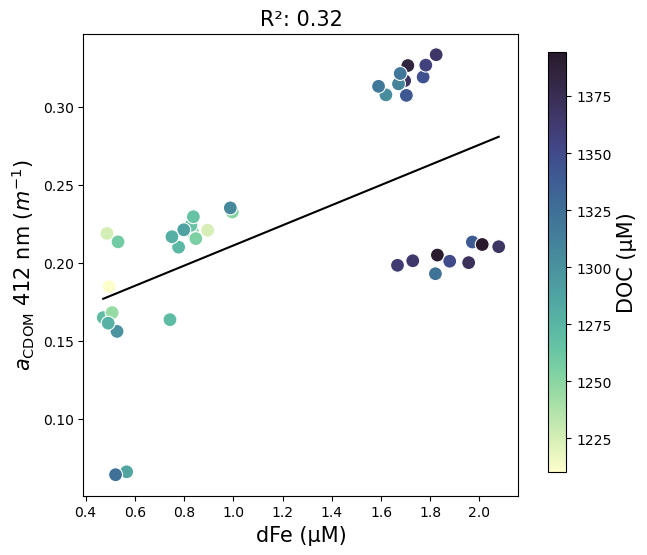

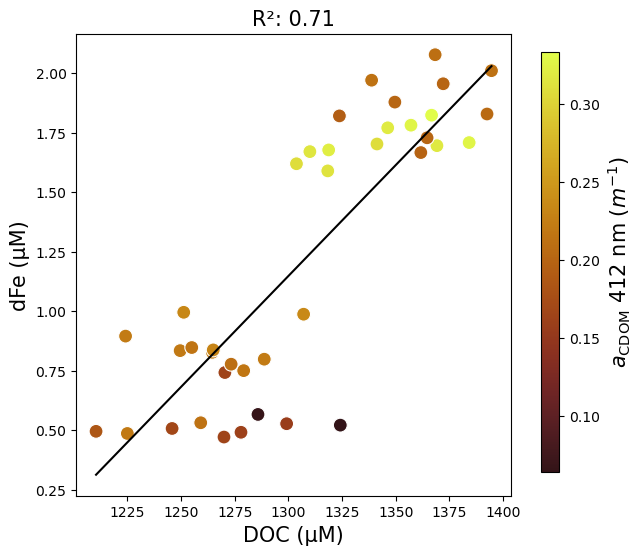

In [13]:
def xyplotcolor(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = df[z_var].min()
    vmax = df[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../HALO/Figures/BC_{save_name}.png')

y_var = 'abs_412_SEM'
x_var = 'NPOC_uM'
y_var_lab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
x_var_lab = 'DOC (µM)'

z_var = 'FeT_uM'
z_var_lab = 'dFe (µM)'
z_var_color = cmo.matter

titel = ""
save_name = 'DOC_CDOM_Fe'

xyplotcolor(df_bc)


y_var = 'abs_412_SEM'
z_var = 'NPOC_uM'
y_var_lab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
z_var_lab = 'DOC (µM)'

x_var = 'FeT_uM'
x_var_lab = 'dFe (µM)'
z_var_color = cmo.deep

titel = ""
save_name = 'Fe_CDOM_DOC'

xyplotcolor(df_bc)


z_var = 'abs_412_SEM'
x_var = 'NPOC_uM'
z_var_lab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
x_var_lab = 'DOC (µM)'

y_var = 'FeT_uM'
y_var_lab = 'dFe (µM)'
z_var_color = cmo.solar

titel = ""
save_name = 'DOC_Fe_CDOM'

xyplotcolor(df_bc)
    


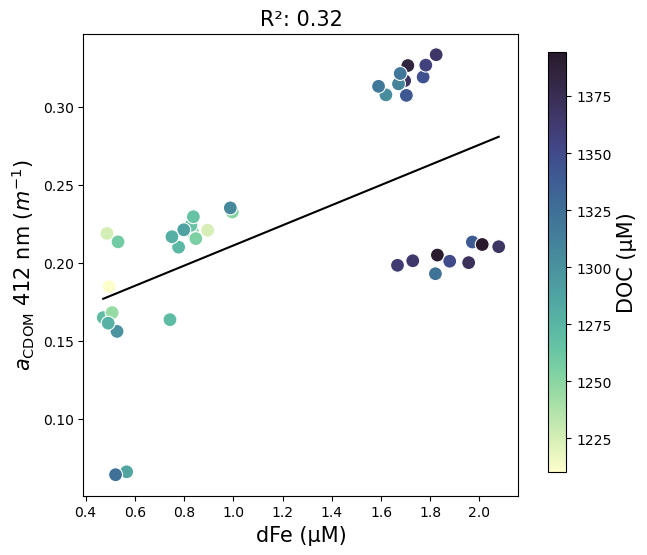

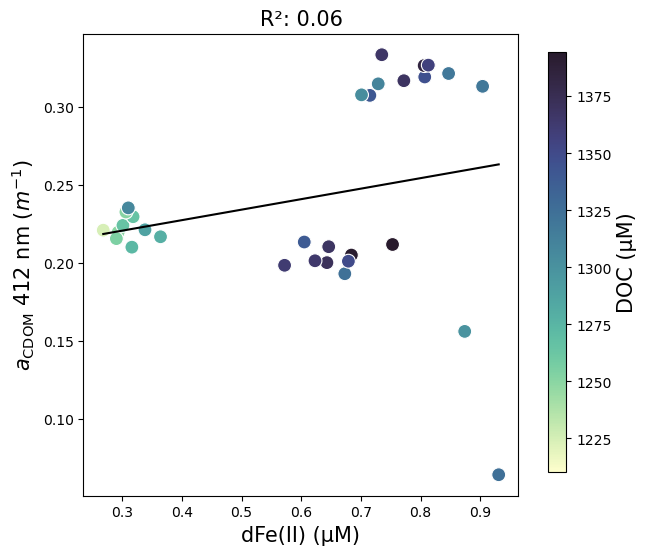

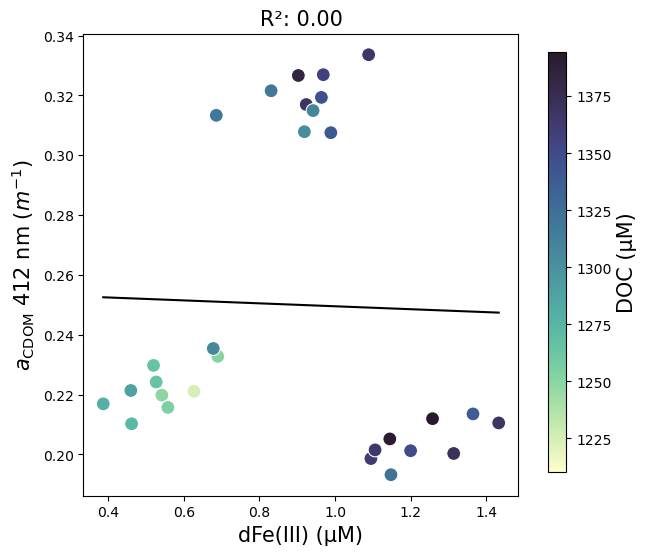

In [14]:
y_var = 'abs_412_SEM'
z_var = 'NPOC_uM'
y_var_lab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
z_var_lab = 'DOC (µM)'

x_var = 'FeT_uM'
x_var_lab = 'dFe (µM)'
z_var_color = cmo.deep

titel = ""
save_name = 'FeT_CDOM_DOC'

xyplotcolor(df_bc)


y_var = 'abs_412_SEM'
z_var = 'NPOC_uM'
y_var_lab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
z_var_lab = 'DOC (µM)'

x_var = 'Fe2_uM'
x_var_lab = 'dFe(II) (µM)'
z_var_color = cmo.deep

titel = ""
save_name = 'Fe2_CDOM_DOC'

xyplotcolor(df_bc)

y_var = 'abs_412_SEM'
z_var = 'NPOC_uM'
y_var_lab = r'$a_{\mathrm{CDOM}}$ 412 nm ($m^{-1}$)'
z_var_lab = 'DOC (µM)'

x_var = 'Fe3_uM'
x_var_lab = 'dFe(III) (µM)'
z_var_color = cmo.deep

titel = ""
save_name = 'Fe3_CDOM_DOC'

xyplotcolor(df_bc)

                            OLS Regression Results                            
Dep. Variable:                NPOC_uM   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     48.19
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.62e-12
Time:                        12:15:56   Log-Likelihood:                -176.41
No. Observations:                  39   AIC:                             360.8
Df Residuals:                      35   BIC:                             367.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1338.4676     33

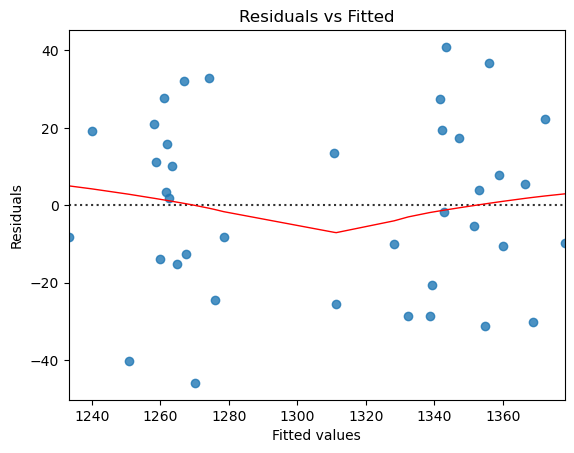

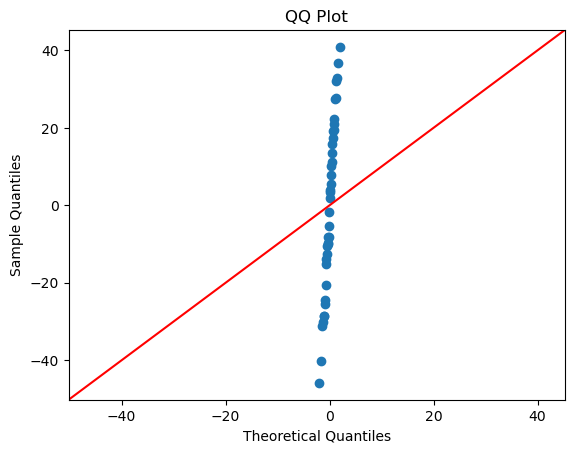

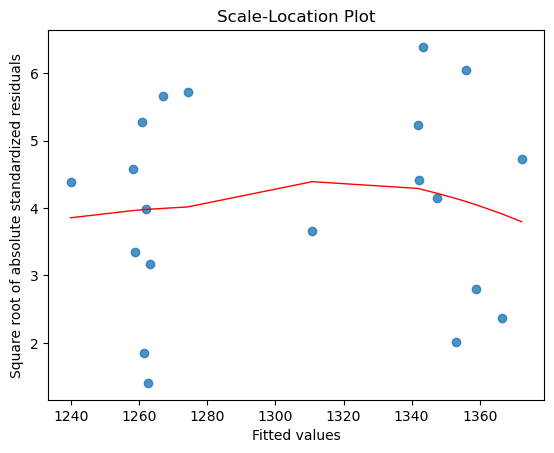

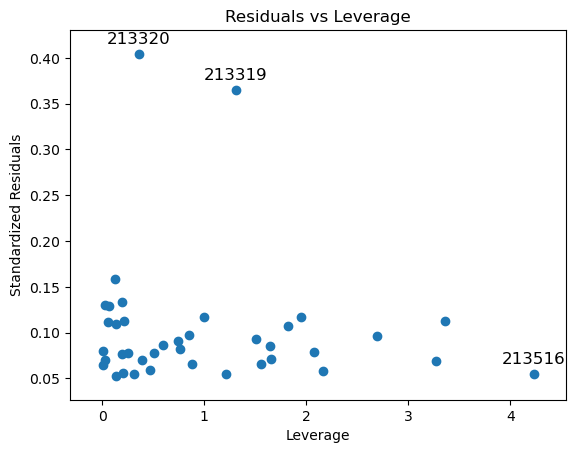

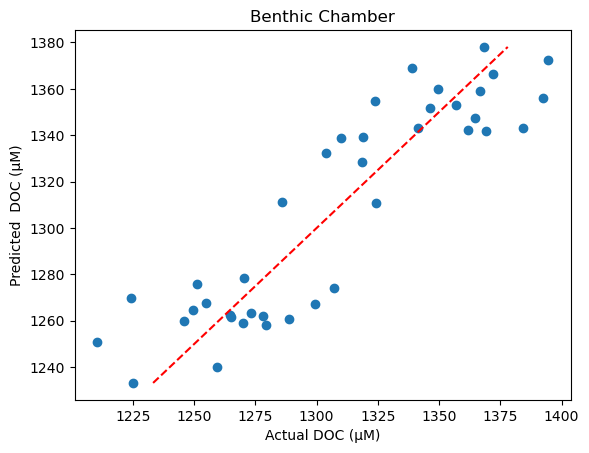

In [15]:
formula = 'NPOC_uM ~ FeT_uM * abs_412_SEM'


# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_bc).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_bc)

# Insert predictions back to dataframe
df_bc['NPOC_uM_pred'] = predicted

# Plot
plt.scatter(df_bc['NPOC_uM'], predicted)
plt.xlabel(r'Actual DOC (µM)')
plt.ylabel('Predicted  DOC (µM)')
plt.title('Benthic Chamber')
plt.plot([df_bc['NPOC_uM_pred'].min(), df_bc['NPOC_uM_pred'].max()], 
         [df_bc['NPOC_uM_pred'].min(), df_bc['NPOC_uM_pred'].max()], 'r--')
plt.show()


